<a href="https://colab.research.google.com/github/Baobui19112001/BaiTapCNN/blob/main/PhanLoaiTienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
model=Sequential() #CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) # tìm giá trị lớn nhất trong ma trận 8x8 để làm cho ảnh có độ nổi lên
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten()) #ANN
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_10 (Bat  (None, 198, 198, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_11 (Bat  (None, 97, 97, 64)      

In [ ]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [ ]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/TienVN/Train/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='/content/drive/MyDrive/AI/TienVN/Validation/',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 110 images belonging to 11 classes.
Found 0 images belonging to 11 classes.


In [ ]:
validation_dataset.class_indices 


{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
history=model.fit(train_dataset,batch_size=10,epochs=80,verbose=1,
                  validation_data=validation_dataset)

Epoch 1/80
11/11 [==============================] - 16s 1s/step - loss: 3.0229 - accuracy: 0.1727
Epoch 2/80
11/11 [==============================] - 13s 1s/step - loss: 2.2329 - accuracy: 0.3000
Epoch 3/80
11/11 [==============================] - 13s 1s/step - loss: 1.8191 - accuracy: 0.4000
Epoch 4/80
11/11 [==============================] - 13s 1s/step - loss: 1.6910 - accuracy: 0.3909
Epoch 5/80
11/11 [==============================] - 13s 1s/step - loss: 1.8355 - accuracy: 0.4182
Epoch 6/80
11/11 [==============================] - 13s 1s/step - loss: 1.7097 - accuracy: 0.4364
Epoch 7/80
11/11 [==============================] - 13s 1s/step - loss: 1.3974 - accuracy: 0.5636
Epoch 8/80
11/11 [==============================] - 13s 1s/step - loss: 1.3901 - accuracy: 0.5364
Epoch 9/80
11/11 [==============================] - 13s 1s/step - loss: 1.4594 - accuracy: 0.5455
Epoch 10/80
11/11 [==============================] - 13s 1s/step - loss: 1.2804 - accuracy: 0.5273
Epoch 11/80
11/11 [

In [ ]:
from keras.models import load_model
model.save('Phanloaitien.h5')

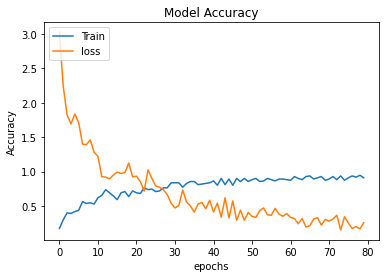

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()


In [ ]:
classes=['1000',
 '10000',
 '100000',
 '200',
 '2000',
 '20000',
 '200000',
 '500',
 '5000',
 '50000',
 '500000']

1000


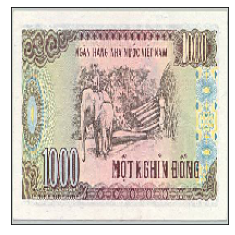

In [ ]:
filename = '/content/drive/MyDrive/AI/TienVN/Validation/1000/1000vnd (1).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

2000


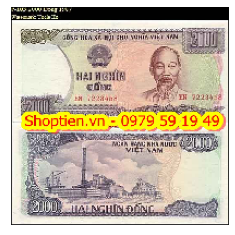

In [ ]:
filename = '/content/drive/MyDrive/AI/TienVN/Validation/2000/2000vnd (1).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

10000


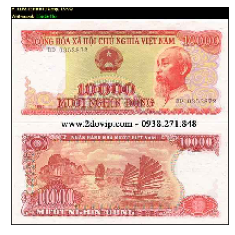

In [ ]:
filename = '/content/drive/MyDrive/AI/TienVN/Validation/10000/10000vnd (1).jpg'  
img=load_img(filename,target_size=(200,200))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])